<a href="https://colab.research.google.com/github/melcutz/Covid19Study/blob/master/SEIR_Covid19_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install seirsplus

In [0]:
from seirsplus.models import *
%matplotlib  inline

Deterministic model (no network)

t = 599.90
[Checkpoint: Updating parameters]
t = 19.90
[Checkpoint: Updating parameters]
t = 99.90


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


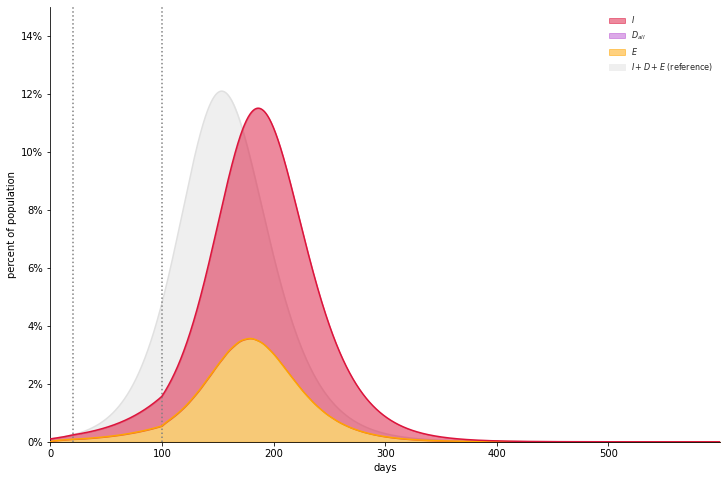

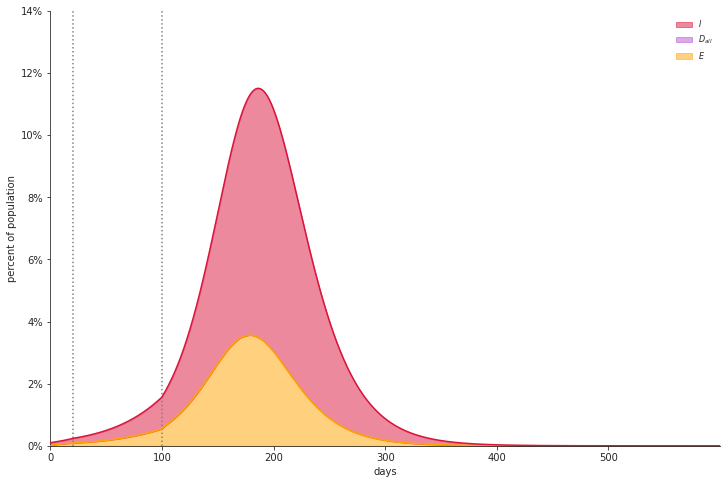

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e7e0073c8>)

In [3]:
#base model; no measures taken
ref_model = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=1000, initN=1000000) 
ref_model.run(T=600)

#measures taken (like social distancing and quarantine but no testing) that reduce the rate of transmission by 80% (beta goes to .12 from .147) on the 20th day
#come back to normal on day 100
model_day20 = SEIRSModel(initN   =1000000,
                   beta    =0.147, 
                   sigma   =1/5.2, 
                   gamma   =1/12.39, 
                   mu_I    =0.0005,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_D  =0.147, 
                   sigma_D =1/5.2, 
                   gamma_D =1/12.39, 
                   mu_D    =0.0005,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =1000, #WA, 03/09 
                   initE   =0, 
                   initD_E =0, 
                   initD_I =0, 
                   initR   =0, 
                   initF   =0)
checkpoints = {'t':       [20, 100], 
               'beta':    [0.12, 0.147]
              }
model_day20.run(T=600, checkpoints=checkpoints)
# model.run(T=600)
model_day20.figure_infections(vlines=checkpoints['t'], ylim=0.15, shaded_reference_results=ref_model)
model_day20.figure_infections(vlines=checkpoints['t'], ylim=0.14)


Testing starts on day:  150
[Checkpoint: Updating parameters]
t = 149.90
[Checkpoint: Updating parameters]
t = 249.90


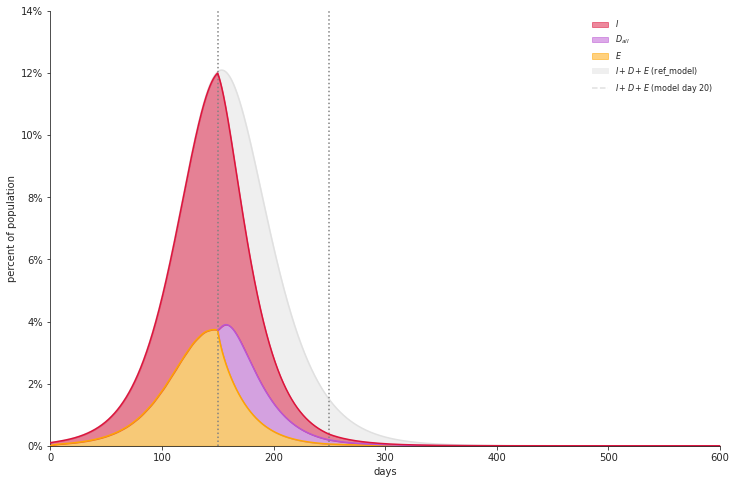

Testing starts on day:  140
[Checkpoint: Updating parameters]
t = 139.90
[Checkpoint: Updating parameters]
t = 239.90


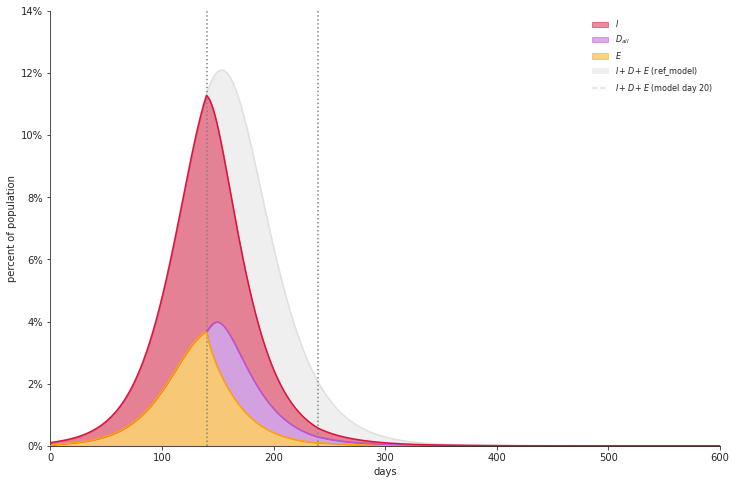

Testing starts on day:  130
[Checkpoint: Updating parameters]
t = 129.90
[Checkpoint: Updating parameters]
t = 229.90


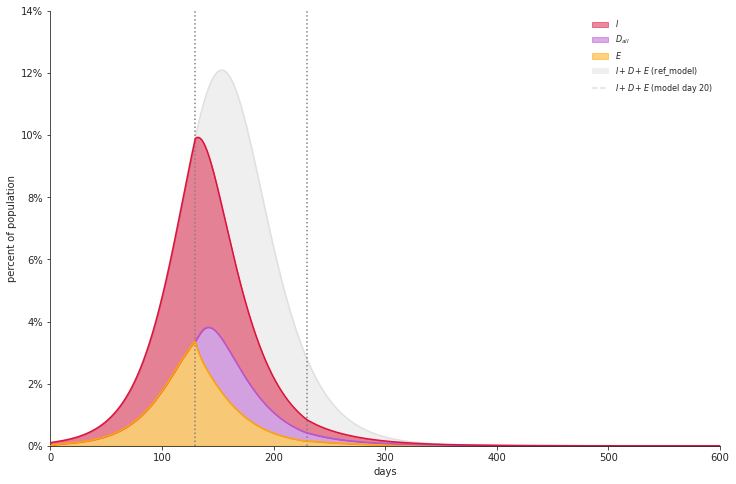

Testing starts on day:  120
[Checkpoint: Updating parameters]
t = 119.90
[Checkpoint: Updating parameters]
t = 219.90


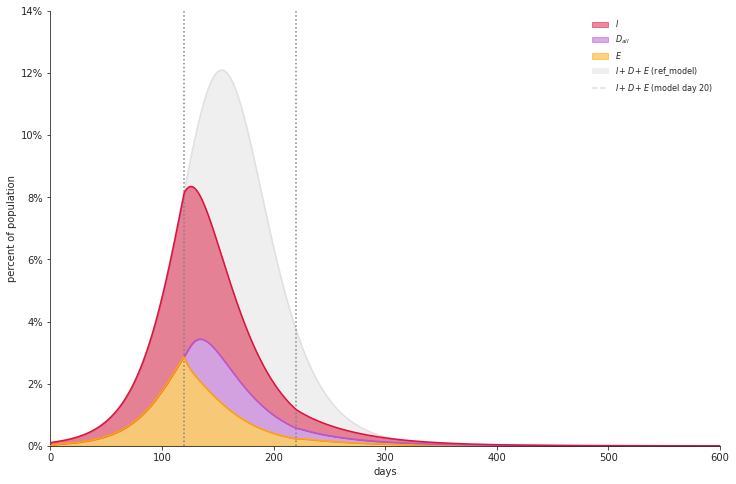

Testing starts on day:  110
[Checkpoint: Updating parameters]
t = 109.90
[Checkpoint: Updating parameters]
t = 209.90


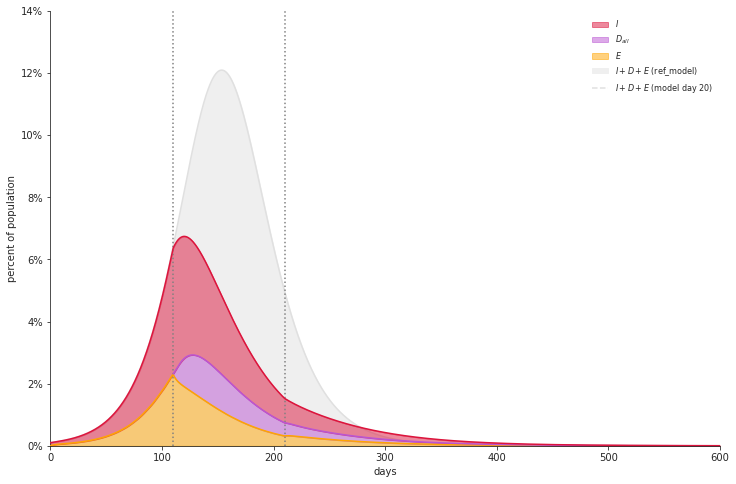

Testing starts on day:  100
[Checkpoint: Updating parameters]
t = 99.90
[Checkpoint: Updating parameters]
t = 199.90


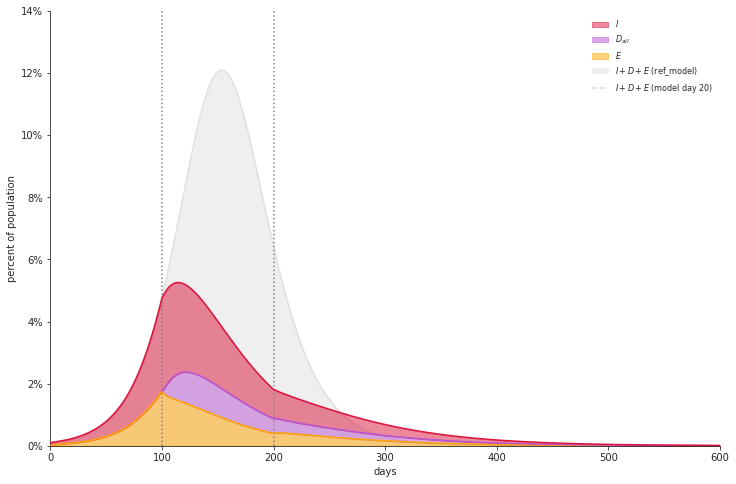

Testing starts on day:  90
[Checkpoint: Updating parameters]
t = 89.90
[Checkpoint: Updating parameters]
t = 189.90


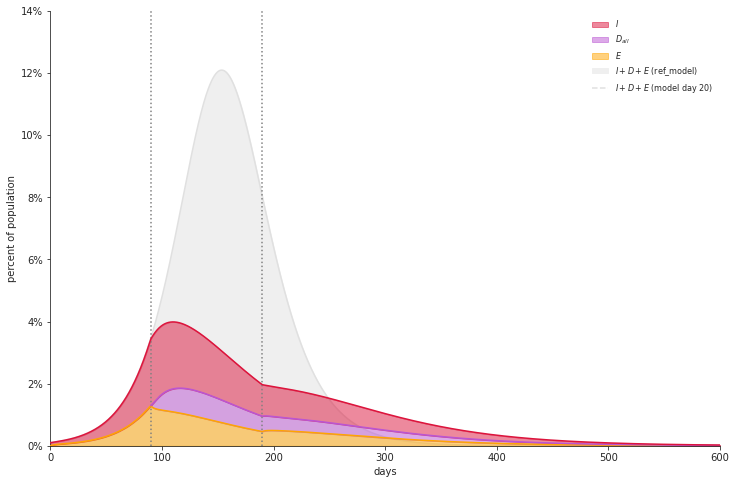

Testing starts on day:  80
[Checkpoint: Updating parameters]
t = 79.90
[Checkpoint: Updating parameters]
t = 179.90


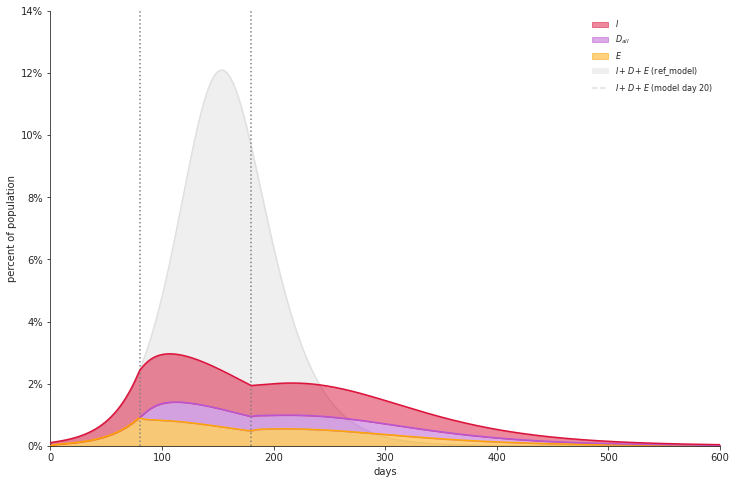

Testing starts on day:  70
[Checkpoint: Updating parameters]
t = 69.90
[Checkpoint: Updating parameters]
t = 169.90


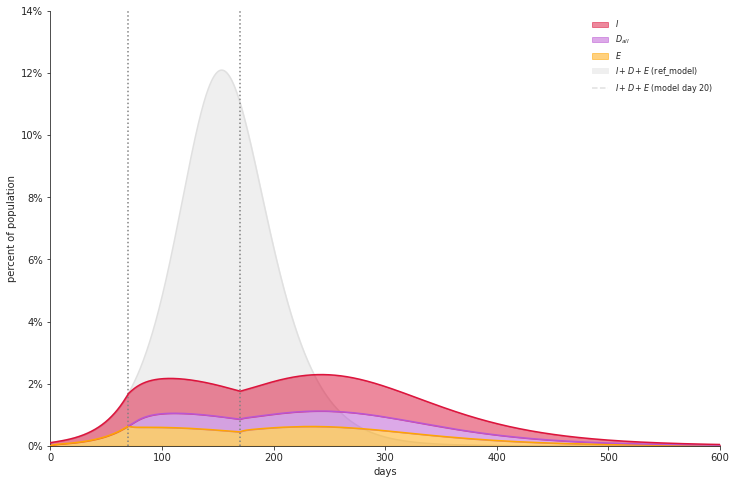

Testing starts on day:  60
[Checkpoint: Updating parameters]
t = 59.90
[Checkpoint: Updating parameters]
t = 159.90


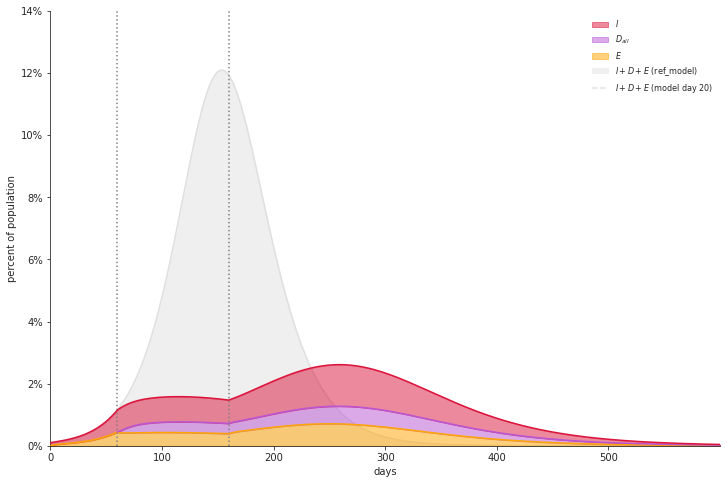

Testing starts on day:  50
[Checkpoint: Updating parameters]
t = 49.90
[Checkpoint: Updating parameters]
t = 149.90


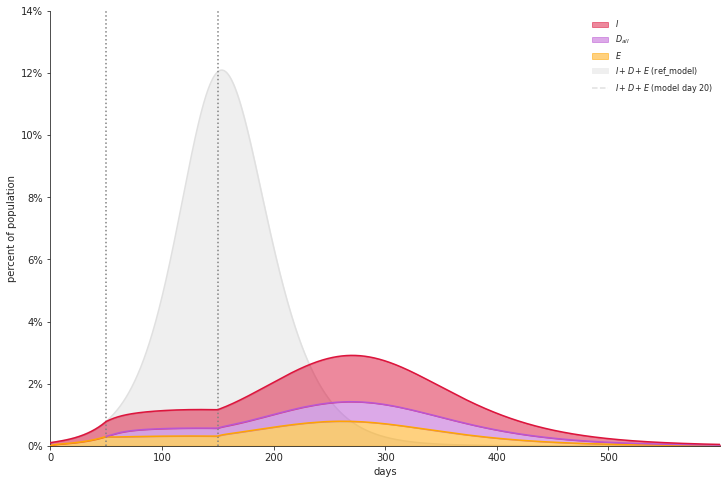

Testing starts on day:  40
[Checkpoint: Updating parameters]
t = 39.90
[Checkpoint: Updating parameters]
t = 139.90


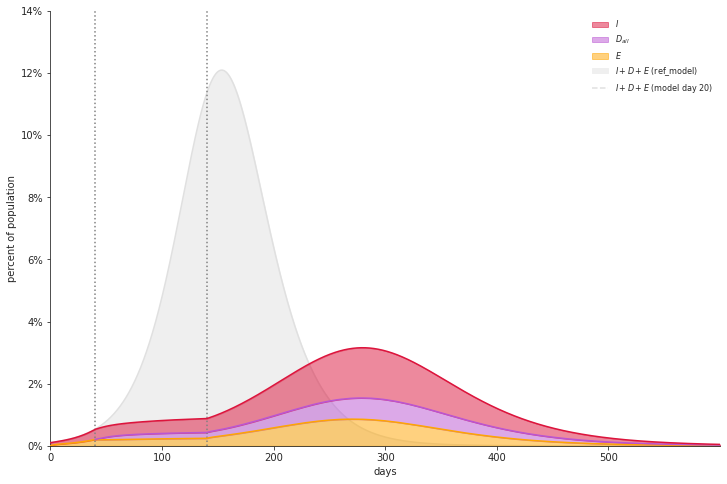

Testing starts on day:  30
[Checkpoint: Updating parameters]
t = 29.90
[Checkpoint: Updating parameters]
t = 129.90


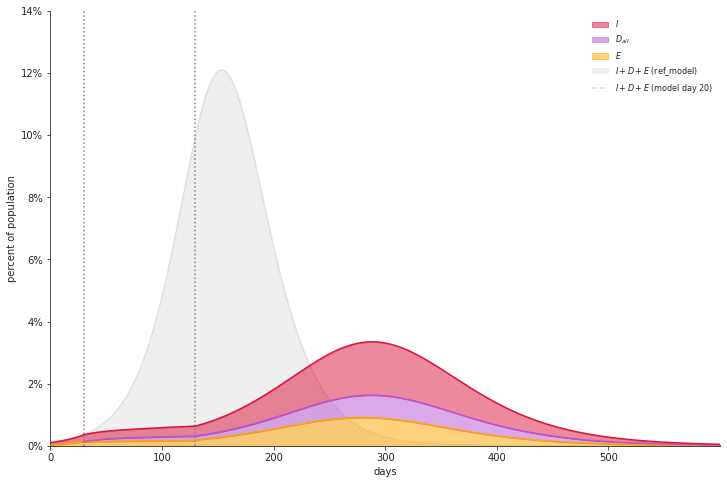

Testing starts on day:  20
[Checkpoint: Updating parameters]
t = 19.90
[Checkpoint: Updating parameters]
t = 119.90


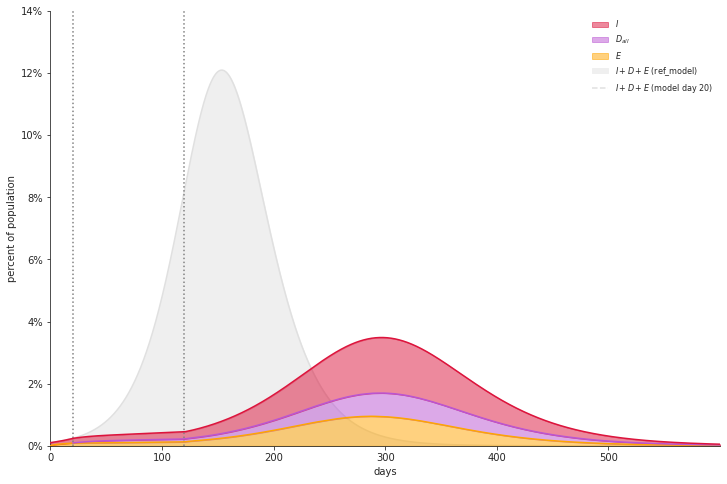

In [4]:
#measures taken (like social distancing and quarantine and testing) that reduce the rate of transmission by 80% (beta goes to .12 from .147) on the 20th day
#come back to normal on day 100

#testing starts on day 20 and continues throught with 2% positives out of E and I
for init_t in range(150,10,-10):
  model_day20_testing = SEIRSModel(initN   =1000000,
                   beta    =0.147, 
                   sigma   =1/5.2, 
                   gamma   =1/12.39, 
                   mu_I    =0.0005,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_D  =0.147, 
                   sigma_D =1/5.2, 
                   gamma_D =1/12.39, 
                   mu_D    =0.0005,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =1000, #WA, 03/09 
                   initE   =0, 
                   initD_E =0, 
                   initD_I =0, 
                   initR   =0, 
                   initF   =0)
  print('Testing starts on day: ',init_t)
  checkpoints = {'t':       [init_t, init_t+100], 
                'beta':    [0.12, 0.147], 
                'theta_E': [0.02, 0.02], 
                'theta_I': [0.02, 0.02]
                }
  model_day20_testing.run(T=600, checkpoints=checkpoints, verbose=False)
  model_day20_testing.figure_infections(vlines=checkpoints['t'], ylim=0.14, shaded_reference_results=ref_model,shaded_reference_label="ref_model", dashed_reference_results=model_day20, dashed_reference_label="model day 20")


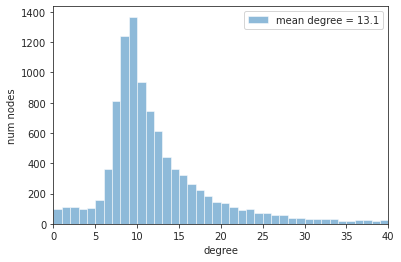

In [5]:
import networkx
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=40)

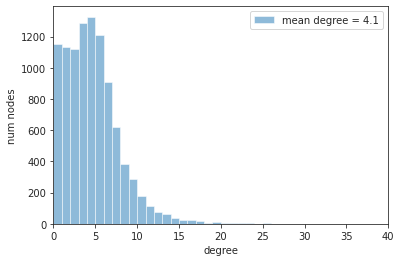

In [6]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)

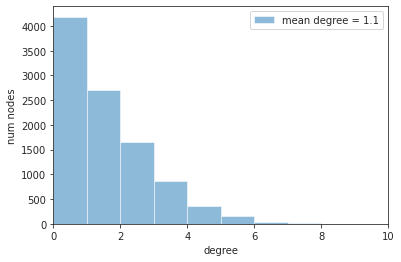

In [7]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=3)
plot_degree_distn(G_quarantine, max_degree=10)

t = 299.90


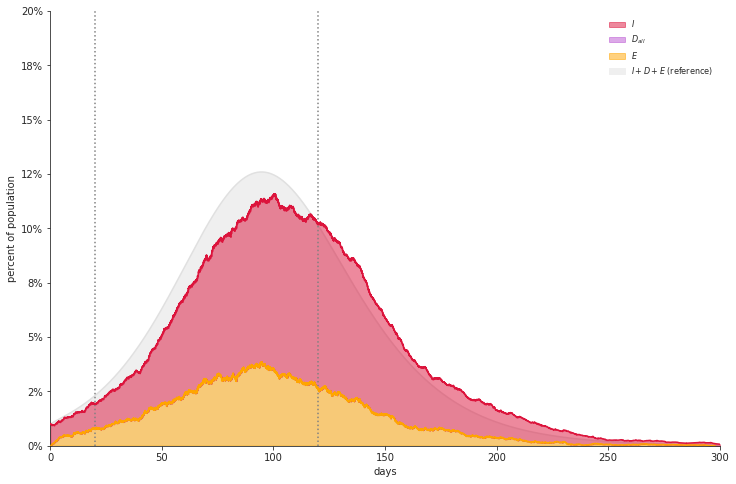

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e7dd14240>)

In [8]:
ref_model = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=numNodes/100, initN=numNodes) 
ref_model.run(T=300)
network_ref_model = SEIRSNetworkModel(G=G_normal, beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
network_ref_model.run(T=300,verbose=False)

network_ref_model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)

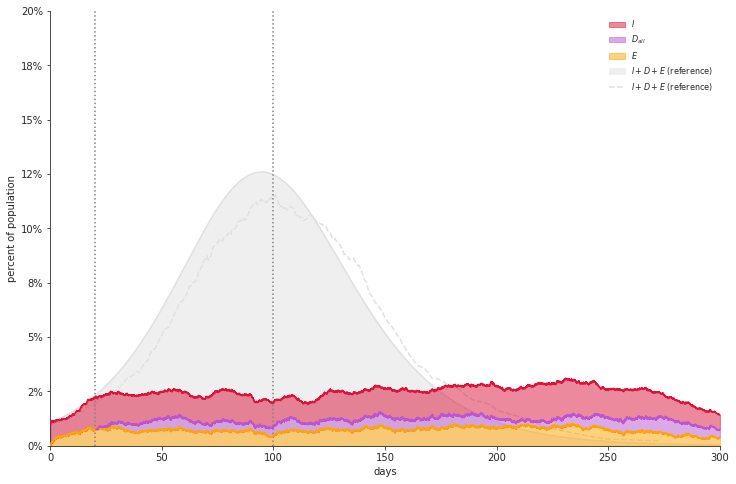

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e7dbea0b8>)

In [9]:
network_model = SEIRSNetworkModel(G =G_normal, 
                          beta    =0.147, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)

checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.1, 0.5], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}
network_model.run(T=300, checkpoints=checkpoints,verbose=False)
network_model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model, dashed_reference_results=network_ref_model)

[Checkpoint: Updating parameters]
t = 19.90
[Checkpoint: Updating parameters]
t = 99.90


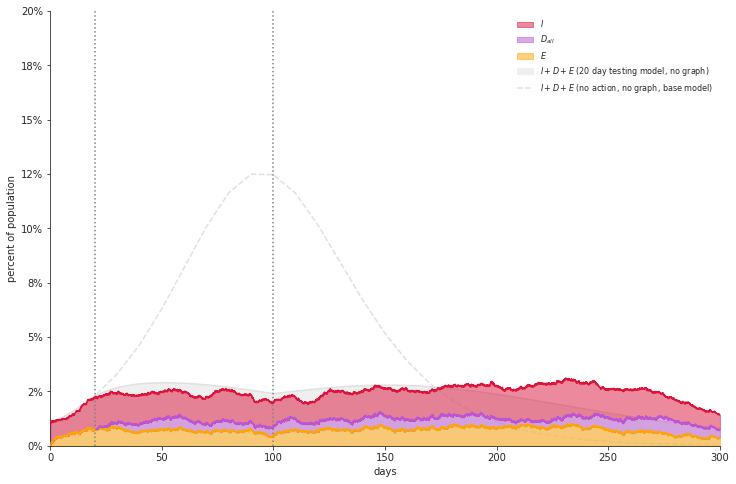

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2e7a3bde48>)

In [11]:
model_day20_testing = SEIRSModel(initN   =numNodes,
                   beta    =0.147, 
                   sigma   =1/5.2, 
                   gamma   =1/12.39, 
                   mu_I    =0.0005,
                   mu_0    =0, 
                   nu      =0, 
                   xi      =0,
                   beta_D  =0.147, 
                   sigma_D =1/5.2, 
                   gamma_D =1/12.39, 
                   mu_D    =0.0005,
                   theta_E =0, 
                   theta_I =0, 
                   psi_E   =1.0, 
                   psi_I   =1.0,
                   initI   =numNodes/100, 
                   initE   =0, 
                   initD_E =0, 
                   initD_I =0, 
                   initR   =0, 
                   initF   =0)
checkpoints = {'t':       [20, 100], 
                'beta':    [0.12, 0.147], 
                'theta_E': [0.02, 0.02], 
                'theta_I': [0.02, 0.02]
                }
model_day20_testing.run(T=300, checkpoints=checkpoints,verbose=False)
network_model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=model_day20_testing,shaded_reference_label="20 day testing model, no graph", dashed_reference_results=ref_model, dashed_reference_label="no action, no graph, base model")